### Unit RNN 

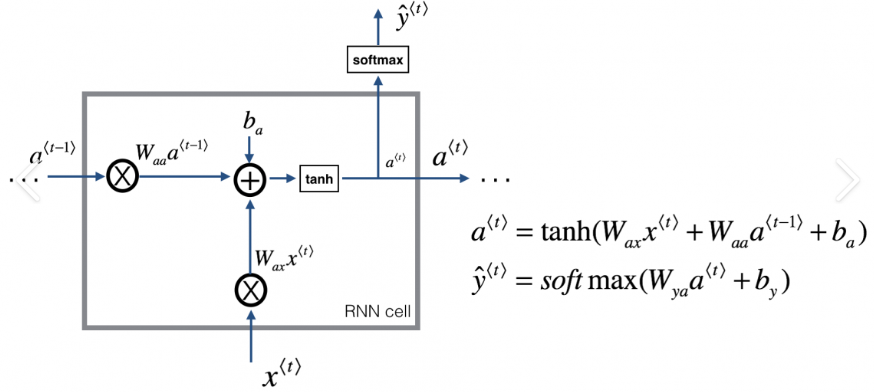

In [1]:
import numpy as np 


In [27]:
input_size = 10
hidden_size = 5
output_size = 3


W_aa = np.random.randn(hidden_size,hidden_size)
W_ax = np.random.randn(hidden_size,input_size) 
W_ya = np.random.randn(output_size,hidden_size)
ba = np.zeros((hidden_size,1))
by = np.zeros((output_size,1))

In [30]:
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)
def rnn_unit(xt, aprev):
    net_input = np.dot(W_ax, xt) + np.dot(W_aa, aprev) + ba
    #              (5,10) * (10,1) + (5,5) * (5,1)  + (5,1)
    at = np.tanh(net_input)
    ot = np.dot(W_ya, at) + by
    #          (3,5) * (5,1) + (3,1)
    yt = softmax(ot)

    return at, yt

In [31]:
xt = np.random.randn(input_size,1)  # (1,5)
aprev = np.random.randn(hidden_size, 1) #(3,1)

at, yt = rnn_unit(xt, aprev)

print("a<t>:  \n", at)
print("y<t>:  \n", yt)

a<t>:  
 [[-0.88735656]
 [-0.9005449 ]
 [-0.99999407]
 [-0.99680137]
 [ 0.96147227]]
y<t>:  
 [[1.]
 [1.]
 [1.]]


### RNN using Keras

In [51]:
from keras.models import Sequential 
from keras.layers import Embedding, SimpleRNN , Dense


In [46]:
from keras.datasets import imdb 
from tensorflow.keras.preprocessing import sequence 

In [39]:
max_feature = 10000 
maxlen = 500 
batch_size = 32 


In [40]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_feature)

In [41]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [42]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


In [52]:
model = Sequential()
model.add(Embedding(max_feature,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [53]:
history = model.fit(x_train,y_train,epochs = 10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 22s 128ms/step - loss: 0.6827 - acc: 0.5511 - val_loss: 0.6550 - val_acc: 0.6310
Epoch 2/10
157/157 [==============================] - 22s 140ms/step - loss: 0.5055 - acc: 0.7658 - val_loss: 0.4196 - val_acc: 0.8186
Epoch 3/10
157/157 [==============================] - 22s 142ms/step - loss: 0.3257 - acc: 0.8672 - val_loss: 0.5333 - val_acc: 0.7476
Epoch 4/10
157/157 [==============================] - 22s 139ms/step - loss: 0.2460 - acc: 0.9043 - val_loss: 0.3547 - val_acc: 0.8494
Epoch 5/10
157/157 [==============================] - 22s 139ms/step - loss: 0.1821 - acc: 0.9324 - val_loss: 0.4297 - val_acc: 0.8344
Epoch 6/10
157/157 [==============================] - 22s 140ms/step - loss: 0.1394 - acc: 0.9533 - val_loss: 0.4254 - val_acc: 0.8618
Epoch 7/10
157/157 [==============================] - 23s 145ms/step - loss: 0.0833 - acc: 0.9714 - val_loss: 0.4794 - val_acc: 0.8284
Epoch 8/10
157/157 [==============================] - 2

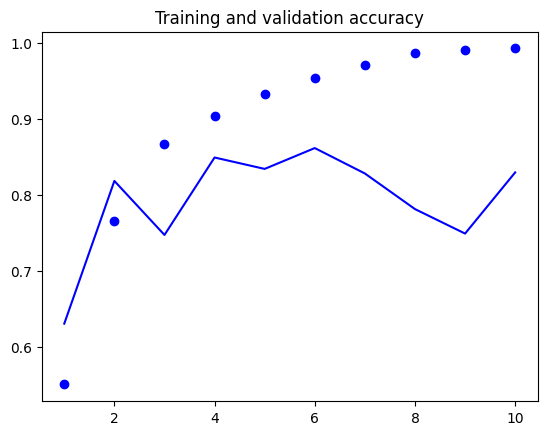

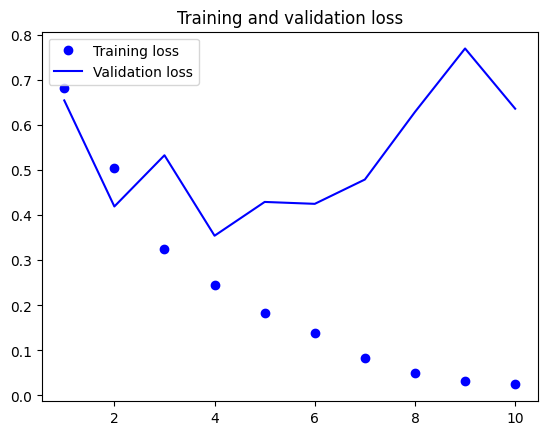

In [56]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.show()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()